In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)

# Load CSVs
df_wt = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results.csv")
df_scn1a = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results (1).csv")



# Clean and combine
df_wt = df_wt[['structure-abbrev', 'sum']].dropna()
df_wt['label'] = 'wild-type'

df_scn1a = df_scn1a[['structure-abbrev', 'sum']].dropna()
df_scn1a['label'] = 'SCN1A-Cre'

df = pd.concat([df_wt, df_scn1a], ignore_index=True)
df = df[df['sum'] > 0]

# Encode brain region (structure-abbrev)
df_encoded = pd.get_dummies(df, columns=['structure-abbrev'])

# Train/test split
X = df_encoded.drop(columns=['label'])
y = df_encoded['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# Balanced, regularized Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
def print_metrics(y_true, y_pred, title):
    print(f"\n📊 {title} Metrics")
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision (avg): {precision_score(y_true, y_pred, average='macro'):.2f}")
    print(f"Recall (avg)   : {recall_score(y_true, y_pred, average='macro'):.2f}")
    print(f"F1 Score (avg) : {f1_score(y_true, y_pred, average='macro'):.2f}")
    print(classification_report(y_true, y_pred))

# Train/test metrics
print_metrics(y_train, model.predict(X_train), "Training Set")
print_metrics(y_test, model.predict(X_test), "Test Set")

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print(f"\n🔁 5-Fold CV F1 Score (macro avg): {scores.mean():.2f}")



📊 Training Set Metrics
Accuracy       : 0.78
Precision (avg): 0.57
Recall (avg)   : 0.85
F1 Score (avg) : 0.55
              precision    recall  f1-score   support

   SCN1A-Cre       0.13      0.92      0.24        13
   wild-type       1.00      0.78      0.87       348

    accuracy                           0.78       361
   macro avg       0.57      0.85      0.55       361
weighted avg       0.97      0.78      0.85       361


📊 Test Set Metrics
Accuracy       : 0.75
Precision (avg): 0.57
Recall (avg)   : 0.87
F1 Score (avg) : 0.54
              precision    recall  f1-score   support

   SCN1A-Cre       0.13      1.00      0.24         6
   wild-type       1.00      0.74      0.85       150

    accuracy                           0.75       156
   macro avg       0.57      0.87      0.54       156
weighted avg       0.97      0.75      0.83       156


🔁 5-Fold CV F1 Score (macro avg): 0.59


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)

# Load your projection CSVs
df_wt = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results.csv")
df_scn1a = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results (1).csv")

# Keep only required columns and add labels
df_wt = df_wt[['structure-abbrev', 'sum']].dropna()
df_wt['label'] = 'wild-type'

df_scn1a = df_scn1a[['structure-abbrev', 'sum']].dropna()
df_scn1a['label'] = 'SCN1A-Cre'

# Merge datasets
df = pd.concat([df_wt, df_scn1a], ignore_index=True)
df = df[df['sum'] > 0]  # remove any 0 signal cases

# One-hot encode the structure-abbrev
df_encoded = pd.get_dummies(df, columns=['structure-abbrev'])

# Split features and labels
X = df_encoded.drop(columns=['label'])
y = df_encoded['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# ✅ Regularized model with class balancing
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# ✅ Evaluation function
def print_all_metrics(X_train, y_train, X_test, y_test, model):
    # Training
    y_train_pred = model.predict(X_train)
    print("\n📊 Training Set:")
    print(f"Accuracy  : {accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Precision : {precision_score(y_train, y_train_pred, average='macro'):.2f}")
    print(f"Recall    : {recall_score(y_train, y_train_pred, average='macro'):.2f}")
    print(f"F1 Score  : {f1_score(y_train, y_train_pred, average='macro'):.2f}")

    # Testing
    y_test_pred = model.predict(X_test)
    print("\n📊 Test Set:")
    print(f"Accuracy  : {accuracy_score(y_test, y_test_pred):.2f}")
    print(f"Precision : {precision_score(y_test, y_test_pred, average='macro'):.2f}")
    print(f"Recall    : {recall_score(y_test, y_test_pred, average='macro'):.2f}")
    print(f"F1 Score  : {f1_score(y_test, y_test_pred, average='macro'):.2f}")
    print("\n🧠 Classification Report:\n", classification_report(y_test, y_test_pred))

# 🔁 Cross-validation (5-fold)
cv_score = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print(f"\n🔁 Cross-Validation F1 Score (macro, 5-fold): {cv_score.mean():.2f}")

# Run all evaluations
print_all_metrics(X_train, y_train, X_test, y_test, model)



🔁 Cross-Validation F1 Score (macro, 5-fold): 0.59

📊 Training Set:
Accuracy  : 0.78
Precision : 0.57
Recall    : 0.85
F1 Score  : 0.55

📊 Test Set:
Accuracy  : 0.75
Precision : 0.57
Recall    : 0.87
F1 Score  : 0.54

🧠 Classification Report:
               precision    recall  f1-score   support

   SCN1A-Cre       0.13      1.00      0.24         6
   wild-type       1.00      0.74      0.85       150

    accuracy                           0.75       156
   macro avg       0.57      0.87      0.54       156
weighted avg       0.97      0.75      0.83       156



In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)
from sklearn.utils import resample

# Load your projection CSVs
df_wt = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results.csv")
df_scn1a = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results (1).csv")

# Clean and label
df_wt = df_wt[['structure-abbrev', 'sum']].dropna()
df_wt['label'] = 'wild-type'

df_scn1a = df_scn1a[['structure-abbrev', 'sum']].dropna()
df_scn1a['label'] = 'SCN1A-Cre'

# Combine and filter
df = pd.concat([df_wt, df_scn1a], ignore_index=True)
df = df[df['sum'] > 0]

# Upsample SCN1A class
df_minority = df[df['label'] == 'SCN1A-Cre']
df_majority = df[df['label'] == 'wild-type']
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=50,
    random_state=42
)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Add log-transformed sum
df_balanced['log_sum'] = np.log1p(df_balanced['sum'])

# One-hot encode structure-abbrev
df_encoded = pd.get_dummies(df_balanced, columns=['structure-abbrev'])

# Define features and label
X = df_encoded.drop(columns=['label', 'sum'])  # use log_sum only
y = df_encoded['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# Final regularized model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=6,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# Metrics function
def print_metrics(y_true, y_pred, title):
    print(f"\n📊 {title}")
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision (avg): {precision_score(y_true, y_pred, average='macro'):.2f}")
    print(f"Recall (avg)   : {recall_score(y_true, y_pred, average='macro'):.2f}")
    print(f"F1 Score (avg) : {f1_score(y_true, y_pred, average='macro'):.2f}")
    print("\n", classification_report(y_true, y_pred))

# Print results
print_metrics(y_train, model.predict(X_train), "Training Set")
print_metrics(y_test, model.predict(X_test), "Test Set")

# Cross-validation
cv_score = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print(f"\n🔁 Cross-Validation F1 Score (5-fold): {cv_score.mean():.2f}")



📊 Training Set
Accuracy       : 0.81
Precision (avg): 0.66
Recall (avg)   : 0.88
F1 Score (avg) : 0.68

               precision    recall  f1-score   support

   SCN1A-Cre       0.32      0.97      0.48        35
   wild-type       1.00      0.79      0.88       348

    accuracy                           0.81       383
   macro avg       0.66      0.88      0.68       383
weighted avg       0.93      0.81      0.84       383


📊 Test Set
Accuracy       : 0.78
Precision (avg): 0.65
Recall (avg)   : 0.88
F1 Score (avg) : 0.66

               precision    recall  f1-score   support

   SCN1A-Cre       0.29      1.00      0.45        15
   wild-type       1.00      0.76      0.86       150

    accuracy                           0.78       165
   macro avg       0.65      0.88      0.66       165
weighted avg       0.94      0.78      0.83       165


🔁 Cross-Validation F1 Score (5-fold): 0.69


C:\Users\ishsi\AppData\Local\Temp\ipykernel_27976\4057936412.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[f'{col}_x_logsum'] = df_encoded[col] * df_encoded['log_sum']
C:\Users\ishsi\AppData\Local\Temp\ipykernel_27976\4057936412.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[f'{col}_x_logsum'] = df_encoded[col] * df_encoded['log_sum']
C:\Users\ishsi\AppData\Local\Temp\ipykernel_27976\4057936412.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr


📊 Training Set
Accuracy       : 0.98
Precision (avg): 0.96
Recall (avg)   : 0.92
F1 Score (avg) : 0.94
              precision    recall  f1-score   support

   SCN1A-Cre       0.94      0.84      0.89        37
   wild-type       0.98      0.99      0.99       374

    accuracy                           0.98       411
   macro avg       0.96      0.92      0.94       411
weighted avg       0.98      0.98      0.98       411


📊 Test Set
Accuracy       : 0.98
Precision (avg): 0.99
Recall (avg)   : 0.88
F1 Score (avg) : 0.93
              precision    recall  f1-score   support

   SCN1A-Cre       1.00      0.77      0.87        13
   wild-type       0.98      1.00      0.99       124

    accuracy                           0.98       137
   macro avg       0.99      0.88      0.93       137
weighted avg       0.98      0.98      0.98       137



C:\Users\ishsi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ishsi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ishsi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔁 3-Fold CV F1 Score (macro avg): 0.84


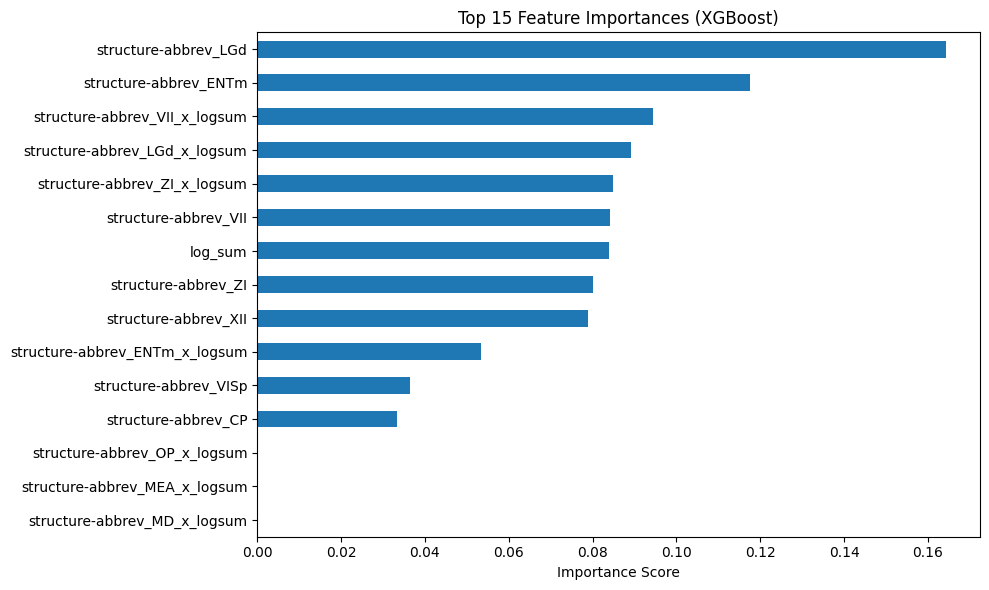

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load your projection CSVs
df_wt = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results.csv")
df_scn1a = pd.read_csv("C:/Users/ishsi/Downloads/projection_search_results (1).csv")


# 2. CLEAN & MERGE
df_wt = df_wt[['structure-abbrev', 'sum']].dropna()
df_wt['label'] = 'wild-type'
df_scn1a = df_scn1a[['structure-abbrev', 'sum']].dropna()
df_scn1a['label'] = 'SCN1A-Cre'
df = pd.concat([df_wt, df_scn1a], ignore_index=True)
df = df[df['sum'] > 0]

# 3. UPSAMPLE SCN1A
df_minority = df[df['label'] == 'SCN1A-Cre']
df_majority = df[df['label'] == 'wild-type']
df_minority_upsampled = resample(df_minority, replace=True, n_samples=50, random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# 4. FEATURE ENGINEERING
df_balanced['log_sum'] = np.log1p(df_balanced['sum'])  # log transform
df_encoded = pd.get_dummies(df_balanced, columns=['structure-abbrev'])

# 5. INTERACTION FEATURES: log_sum × region
for col in df_encoded.columns:
    if col.startswith('structure-abbrev_'):
        df_encoded[f'{col}_x_logsum'] = df_encoded[col] * df_encoded['log_sum']

# 6. FINAL FEATURES + LABELS
X = df_encoded.drop(columns=['label', 'sum'])  # drop raw sum
le = LabelEncoder()
y = le.fit_transform(df_encoded['label'])      # 0 = wild-type, 1 = SCN1A-Cre

# 7. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

# 8. XGBOOST MODEL
xgb = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train)

# 9. METRICS FUNCTION
def print_metrics(y_true, y_pred, title):
    print(f"\n📊 {title}")
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision (avg): {precision_score(y_true, y_pred, average='macro'):.2f}")
    print(f"Recall (avg)   : {recall_score(y_true, y_pred, average='macro'):.2f}")
    print(f"F1 Score (avg) : {f1_score(y_true, y_pred, average='macro'):.2f}")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

# 10. EVALUATE MODEL
print_metrics(y_train, xgb.predict(X_train), "Training Set")
print_metrics(y_test, xgb.predict(X_test), "Test Set")

# 11. FAST 3-FOLD CROSS-VALIDATION
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = []
for train_idx, test_idx in cv.split(X, y):
    xgb.fit(X.iloc[train_idx], y[train_idx])
    preds = xgb.predict(X.iloc[test_idx])
    score = f1_score(y[test_idx], preds, average='macro')
    cv_scores.append(score)

print(f"\n🔁 3-Fold CV F1 Score (macro avg): {np.mean(cv_scores):.2f}")

# 12. FEATURE IMPORTANCE PLOT
plt.figure(figsize=(10, 6))
importance_df = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]
importance_df.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [29]:
# 10. EVALUATE MODEL
def print_metrics_explicit(y_true, y_pred, title):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"\n📊 {title} Performance")
    print(f"Accuracy        : {acc:.2f}")
    print(f"Precision (avg) : {prec:.2f}")
    print(f"Recall (avg)    : {rec:.2f}")
    print(f"F1 Score (avg)  : {f1:.2f}")
    print("\nDetailed report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))
    return acc

# Run both evaluations
train_acc = print_metrics_explicit(y_train, xgb.predict(X_train), "Training Set")
test_acc = print_metrics_explicit(y_test, xgb.predict(X_test), "Test Set")

print(f"\n✅ Summary:")
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy : {test_acc:.2f}")



📊 Training Set Performance
Accuracy        : 0.98
Precision (avg) : 0.97
Recall (avg)    : 0.90
F1 Score (avg)  : 0.94

Detailed report:
              precision    recall  f1-score   support

   SCN1A-Cre       0.97      0.81      0.88        37
   wild-type       0.98      1.00      0.99       374

    accuracy                           0.98       411
   macro avg       0.97      0.90      0.94       411
weighted avg       0.98      0.98      0.98       411


📊 Test Set Performance
Accuracy        : 0.96
Precision (avg) : 0.93
Recall (avg)    : 0.84
F1 Score (avg)  : 0.88

Detailed report:
              precision    recall  f1-score   support

   SCN1A-Cre       0.90      0.69      0.78        13
   wild-type       0.97      0.99      0.98       124

    accuracy                           0.96       137
   macro avg       0.93      0.84      0.88       137
weighted avg       0.96      0.96      0.96       137


✅ Summary:
Training Accuracy: 0.98
Testing Accuracy : 0.96
